<a href="https://colab.research.google.com/github/wanjunyuan95/breaking-captcha/blob/Text-captcha/AllDataCombiningCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import numpy as np
from tensorflow.keras.layers import BatchNormalization,Dense,Dropout,Flatten,Activation
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import cv2
import numpy
import glob
import pylab as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [ ]:
#setting path to the folder
base_image_location = os.path.join("/Users/ceciliasammut/OneDrive - Deakin University/MAAI/SIT764","samples")

#preparing empty list for file names
file_list = []

#iterating through folder to retrieve file names and save them to the file_list folder
#to create y dataset
for filename in os.listdir(base_image_location):
    if filename.endswith((".png",".jpg")):
        file_list.append(filename.rsplit( ".", 1)[ 0 ])
        
#funciton to iterate through folder to save list of imaegs
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith((".png",".jpg")):
            #img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
            img = cv2.imread(os.path.join(folder,filename))
            images.append(img)
    return images

#running image funciton and saving the list
#to create x dataset
image_list = load_images_from_folder(base_image_location)
#converting image list to numpy array
il = np.array(image_list)

print('check1')
print(il.shape)

#creating x (image) and y (labels) dataframes
dfy = np.array(file_list)
dfx = il


check1
(1070, 50, 200, 3)


In [ ]:
### split the data ###
X_train, X_test, Y_train, Y_test = train_test_split(dfx, dfy, test_size=0.5, random_state=42)

In [ ]:
### Shape of the Training data ###
print(X_train.shape)
print(X_test.shape)

(535, 50, 200, 3)
(535, 50, 200, 3)


In [ ]:
### Shape of the Test data ###
print(Y_train.shape)
print(Y_test.shape)

(535,)
(535,)


In [ ]:
print(Y_train[0])
print(Y_test[0])

m4fd8
34fxm


In [ ]:
### Convert data to 'float32' and Normalize data by dividing both X train test by 255 ###
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
### Check converted and normalized data ###
print(X_train.dtype)
print(X_test.dtype)
print(X_train[0])
print(X_test[0])

float32
float32
[[[0.7529412  0.7529412  0.7529412 ]
  [0.7529412  0.7529412  0.7529412 ]
  [0.7529412  0.7529412  0.7529412 ]
  ...
  [0.9843137  0.9843137  0.9843137 ]
  [0.9843137  0.9843137  0.9843137 ]
  [0.9843137  0.9843137  0.9843137 ]]

 [[0.7529412  0.7529412  0.7529412 ]
  [0.7529412  0.7529412  0.7529412 ]
  [0.7529412  0.7529412  0.7529412 ]
  ...
  [0.9843137  0.9843137  0.9843137 ]
  [0.9843137  0.9843137  0.9843137 ]
  [0.9843137  0.9843137  0.9843137 ]]

 [[0.7529412  0.7529412  0.7529412 ]
  [0.7529412  0.7529412  0.7529412 ]
  [0.7529412  0.7529412  0.7529412 ]
  ...
  [0.9843137  0.9843137  0.9843137 ]
  [0.9843137  0.9843137  0.9843137 ]
  [0.9843137  0.9843137  0.9843137 ]]

 ...

 [[0.7647059  0.7647059  0.7647059 ]
  [0.7647059  0.7647059  0.7647059 ]
  [0.7647059  0.7647059  0.7647059 ]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.7647059  0.7647059  0.7647059 ]
  [0.7647059  0.76470

In [ ]:
Y_train2=Y_train.reshape(-1,1)
Y_test2=Y_test.reshape(-1,1)
#class_num = (354,1)

In [ ]:
### Shape of the Test data ###
print(Y_train2.shape)
print(Y_test2.shape)

(535, 1)
(535, 1)


In [ ]:
'''
### One-Hot Encoding to change y values from 1 dimensional arrays to 10 dimensional matrices
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
class_num=Y_test.shape[1]
'''

'\n### One-Hot Encoding to change y values from 1 dimensional arrays to 10 dimensional matrices\nY_train = np_utils.to_categorical(Y_train)\nY_test = np_utils.to_categorical(Y_test)\nclass_num=Y_test.shape[1]\n'

In [ ]:
#Y_train=Y_train.to_string()
#Y_test=Y_test.to_string()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
cat = OneHotEncoder()
cat2 = OneHotEncoder()
y = cat.fit_transform(Y_train2).toarray()
y2 = cat2.fit_transform(Y_test2).toarray()

class_num=y.shape[1]

print(y[25])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
### Building the CNN ###
cnn = Sequential()

cnn.add(Conv2D(32,(3,3),input_shape=X_train.shape[1:],padding='same'))
cnn.add(Activation('relu'))

cnn.add(Dropout(0.2))

cnn.add(BatchNormalization())

cnn.add(Conv2D(64,(3,3),padding='same'))
cnn.add(Activation('relu'))

cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())

cnn.add(Conv2D(64,(3,3),padding='same'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())

cnn.add(Conv2D(128,(3,3),padding='same'))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())

cnn.add(Flatten())
cnn.add(Dropout(0.2))

cnn.add(Dense(256,kernel_constraint=maxnorm(3)))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())

cnn.add(Dense(128,kernel_constraint=maxnorm(3)))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())

cnn.add(Dense(class_num))
cnn.add(Activation('softmax'))

2022-05-12 02:13:50.342155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
### Print network for viewing ###
plot_model(cnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
### Network Compilation ###
epochs = 25
optimizer = 'adam'

cnn.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
### Model summary ###
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 200, 32)       896       
                                                                 
 activation (Activation)     (None, 50, 200, 32)       0         
                                                                 
 dropout (Dropout)           (None, 50, 200, 32)       0         
                                                                 
 batch_normalization (BatchN  (None, 50, 200, 32)      128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 200, 64)       18496     
                                                                 
 activation_1 (Activation)   (None, 50, 200, 64)       0         
                                                        

In [ ]:
### Fitting the model ###
history = cnn.fit(X_train,y,
                  validation_data=(X_test,y2),
                  epochs=epochs,batch_size=64)

Epoch 1/25
9/9 [==============================] - 28s 3s/step - loss: 6.4849 - accuracy: 0.0000e+00 - val_loss: 6.2847 - val_accuracy: 0.0000e+00
Epoch 2/25
9/9 [==============================] - 27s 3s/step - loss: 6.0531 - accuracy: 0.0224 - val_loss: 6.2861 - val_accuracy: 0.0019
Epoch 3/25
9/9 [==============================] - 28s 3s/step - loss: 5.7182 - accuracy: 0.0505 - val_loss: 6.2898 - val_accuracy: 0.0019
Epoch 4/25
9/9 [==============================] - 28s 3s/step - loss: 5.4323 - accuracy: 0.1103 - val_loss: 6.2940 - val_accuracy: 0.0019
Epoch 5/25
9/9 [==============================] - 27s 3s/step - loss: 5.1446 - accuracy: 0.1981 - val_loss: 6.2910 - val_accuracy: 0.0019
Epoch 6/25
9/9 [==============================] - 27s 3s/step - loss: 4.8445 - accuracy: 0.3121 - val_loss: 6.2912 - val_accuracy: 0.0019
Epoch 7/25
9/9 [==============================] - 27s 3s/step - loss: 4.5478 - accuracy: 0.4841 - val_loss: 6.2930 - val_accuracy: 0.0019
Epoch 8/25
9/9 [==========

In [ ]:
### Model score ###
score = cnn.evaluate(X_test,y2,verbose=0)
print('Model Accuracy:%.2f%%'%(score[1]*100))

Model Accuracy:0.19%


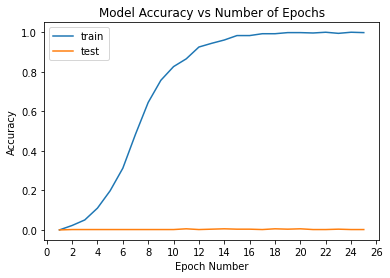

In [ ]:
### Plot the comparison between training and test accuracy ###
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(1,1+len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,28,2))
plt.show()

In [ ]:
### Training performance ###
## Find highest score for the test data ##
highest_score = max(history.history['val_accuracy'])

## Find the training epoch that has the highest test accuracy score 
epoch_num = np.array(history.history['val_accuracy']).argmax()+1

## Print the performance accuracy and training epoch
print((highest_score, epoch_num))

(0.005607476457953453, 11)
